Data loaded. Shape: (332675, 24)

KPI columns used: ['roa', 'total_debt_to_equity', 'current_ratio', 'cfo_margin', 'asset_turnover']
KPI DataFrame shape: (332675, 5)


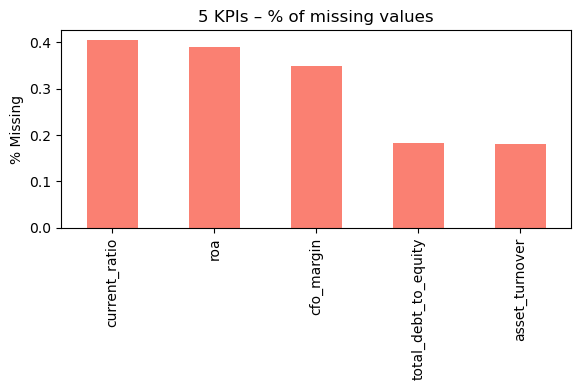

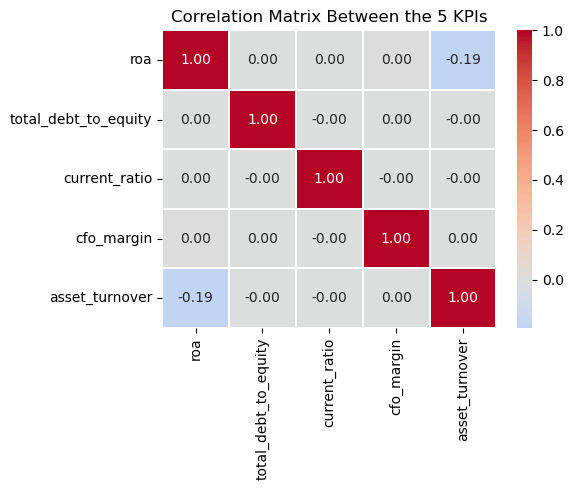

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# -----------------------------
# 1. Load KPIs dataset
# -----------------------------
data_path = "../data/processed/compustat_kpis.csv"
df = pd.read_csv(data_path)

print("Data loaded. Shape:", df.shape)

# Replace infinities with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# -----------------------------
# 2. Select KPI columns
# -----------------------------
kpi_cols = [
    "roa",
    "total_debt_to_equity",
    "current_ratio",
    "cfo_margin",
    "asset_turnover",
]
kpi_cols = [c for c in kpi_cols if c in df.columns]

df_kpi = df[kpi_cols].copy()

print("\nKPI columns used:", kpi_cols)
print("KPI DataFrame shape:", df_kpi.shape)

# -----------------------------
# 3. Missing values barplot
# -----------------------------
if len(df_kpi.columns) > 0:
    missing_ratio = df_kpi.isna().mean().sort_values(ascending=False)

    plt.figure(figsize=(6, 4))
    missing_ratio.plot(kind="bar", color="salmon")
    plt.title("5 KPIs – % of missing values")
    plt.ylabel("% Missing")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo KPI columns available to compute missing values.")

# -----------------------------
# 4. Correlation matrix
# -----------------------------
df_corr = df_kpi.dropna()

if len(df_corr.columns) > 1 and len(df_corr) > 0:
    corr = df_corr.corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        corr,
        cmap="coolwarm",
        center=0,
        annot=True,
        fmt=".2f",
        linewidths=0.3,
    )
    plt.title("Correlation Matrix Between the 5 KPIs")
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough valid KPI data for correlation matrix.")
